In [9]:
# Data visualizations to better understand our data. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_csv('data/trulia_clean_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,City,Lat,Lon,Street,Trulia Est,Zip Code,Beds,Baths,Sqft,Price_Per_Sqft,Year Built,Heating Type,Parking Spots
0,0,36.987129,-121.934517,6109 Abbey Rd,592074,95003,2,2.5,1190,203,1981,0,1
1,0,36.987240,-121.934631,6113 Abbey Rd,645689,95003,2,2.5,1190,458,1981,0,1
2,0,36.987060,-121.933520,6116 Abbey Rd,1137642,95003,3,2.5,2476,143,1989,0,2
3,0,36.987180,-121.934790,6119 Abbey Rd,567378,95003,2,1.5,1044,358,1981,0,1
4,0,36.969760,-121.884850,509 Alta Dr,771092,95003,3,2.0,1226,186,1984,0,1


In [10]:
df.shape

(1570, 13)

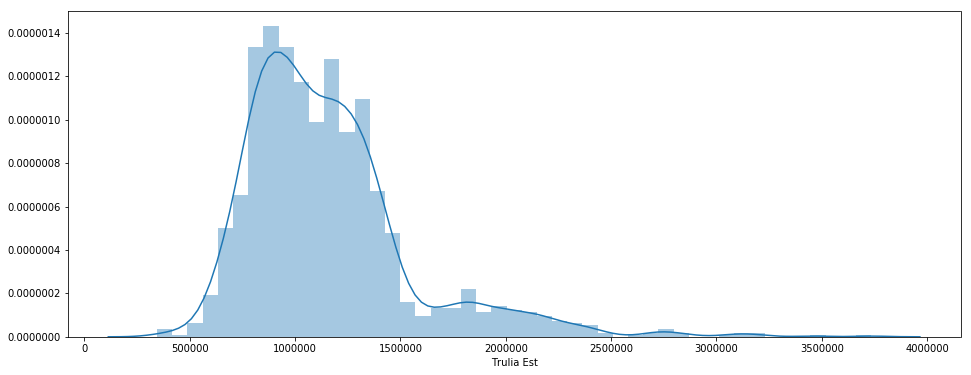

In [11]:
# Estimated Price histogram.
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.distplot(df['Trulia Est'])

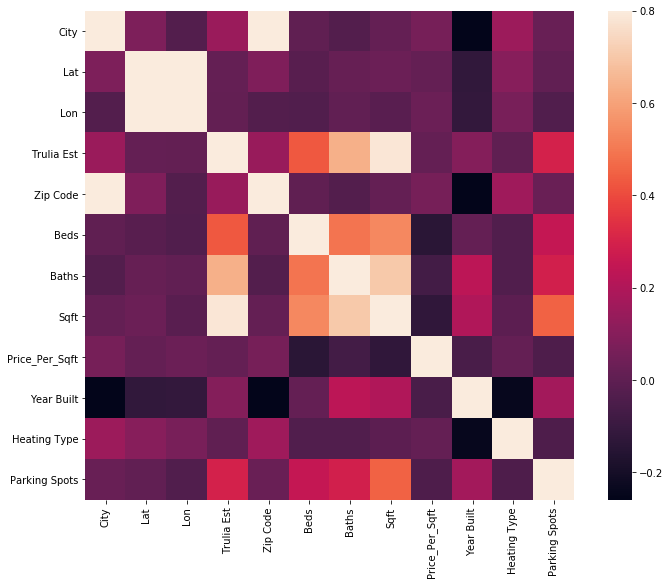

In [12]:
# Correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

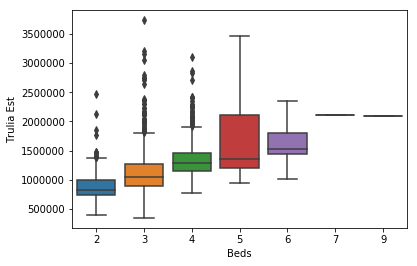

In [13]:
import seaborn as sns
# Boxplot of beds and estimated price
ax1 = sns.boxplot(x='Beds', y='Trulia Est', data=df)

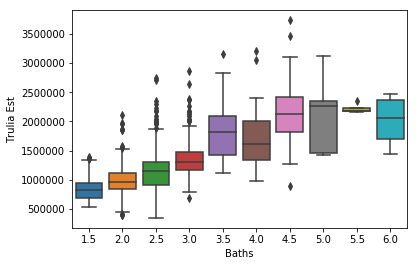

In [14]:
# Boxplot of baths and estimated price
ax2 = sns.boxplot(x='Baths', y='Trulia Est', data=df)

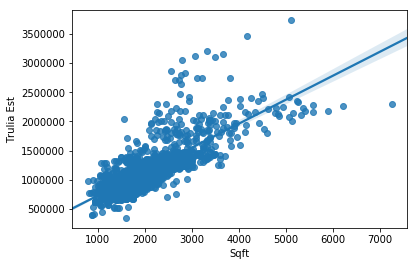

In [15]:
# scatter plot of square feet and estimated price
ax3 = sns.regplot(x='Sqft', y='Trulia Est', data=df)

The 6 columns with the highest correlation with the estimated price:
['Trulia Est', 'Sqft', 'Baths', 'Beds', 'Parking Spots', 'City']


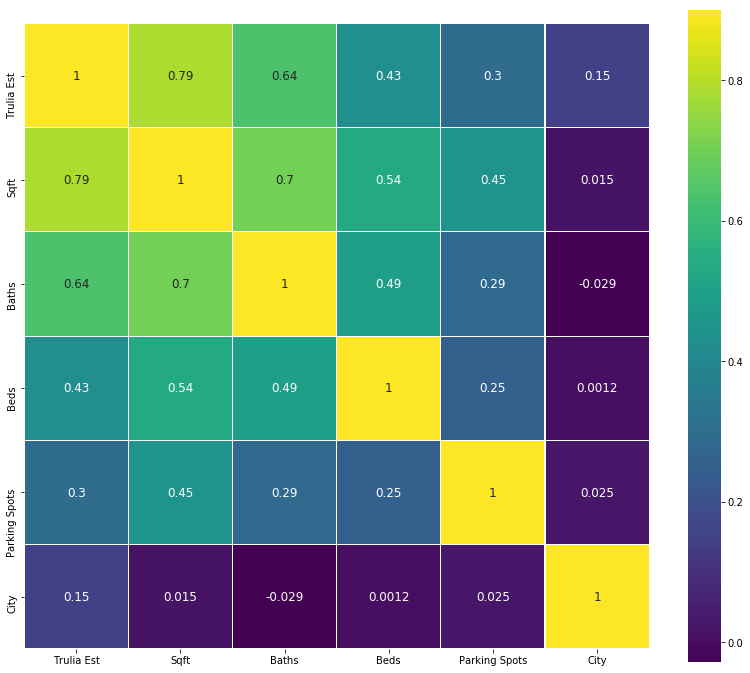

In [16]:
k = 6   # we'll look at the 6 largest correlations
correlation = df.corr()
cols = correlation.nlargest(k, 'Trulia Est')['Trulia Est'].index

print('The', k, 'columns with the highest correlation with the estimated price:')
print(list(cols))   # the k variables that correlate most highly with Trulia Est

cm = np.corrcoef(df[cols].values.T)
f , ax4 = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, 
            vmax = .9, 
            linewidths = 0.01, 
            square = True, 
            annot = True, 
            cmap = 'viridis',
            linecolor = "white", 
            xticklabels = cols.values, 
            annot_kws = {'size': 12}, 
            yticklabels = cols.values)